In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn import metrics
import time
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
original_df = pd.read_csv(r'C:\Users\james\Documents\Hishtalmut_Kamdan\Targil 1 - Data Visualiztion\My - Home Credit Default Risk.csv')

In [6]:
original_df.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
original_df.describe()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,FLAG_MOBIL,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE
count,200.00000,200.000000,200.000000,200.000000,200.000000,62.000000,200.0,200.000000,2.000000e+02,200.000000,1.990000e+02,200.000000,200.000000,173.000000,200.000000,200.000000,70.000000
mean,270403.43000,0.530000,0.415000,0.350000,0.675000,2.983871,1.0,166508.077500,5.797395e+05,26644.432500,5.299062e+05,0.022210,-15431.775000,-2143.156069,-4979.015000,-2714.735000,10.357143
std,102754.90276,0.548273,0.493958,0.478167,0.480133,12.537801,0.0,79513.931318,4.256225e+05,14230.569344,3.863517e+05,0.014674,4239.863177,2012.555094,3613.200654,1582.590756,6.297079
min,100229.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,31500.000000,-5.736285e+05,4450.500000,-2.295000e+05,0.001333,-24667.000000,-11239.000000,-13726.000000,-5789.000000,0.000000
25%,190624.75000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,112500.000000,2.666531e+05,15925.500000,2.272500e+05,0.010556,-18240.500000,-2941.000000,-7232.000000,-4204.750000,6.000000
50%,251583.50000,1.000000,0.000000,0.000000,1.000000,1.000000,1.0,149625.000000,4.975200e+05,25285.500000,4.500000e+05,0.019101,-15073.000000,-1607.000000,-4543.500000,-2852.500000,10.000000
75%,368203.75000,1.000000,1.000000,1.000000,1.000000,2.000000,1.0,202500.000000,8.086500e+05,35294.625000,6.997500e+05,0.028663,-12043.000000,-734.000000,-1906.750000,-1160.250000,16.000000
max,455250.00000,2.000000,1.000000,1.000000,2.000000,100.000000,1.0,450000.000000,2.250000e+06,67500.000000,2.250000e+06,0.072508,-7765.000000,0.000000,-27.000000,-152.000000,24.000000


In [8]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
SK_ID_CURR                    200 non-null int64
TARGET                        200 non-null int64
NAME_CONTRACT_TYPE            200 non-null object
NAME_TYPE_SUITE               199 non-null object
NAME_INCOME_TYPE              200 non-null object
NAME_EDUCATION_TYPE           200 non-null object
NAME_FAMILY_STATUS            200 non-null object
NAME_HOUSING_TYPE             200 non-null object
OCCUPATION_TYPE               149 non-null object
WEEKDAY_APPR_PROCESS_START    200 non-null object
ORGANIZATION_TYPE             200 non-null object
FONDKAPREMONT_MODE            66 non-null object
HOUSETYPE_MODE                95 non-null object
WALLSMATERIAL_MODE            95 non-null object
CODE_GENDER                   200 non-null int64
FLAG_OWN_CAR                  200 non-null int64
FLAG_OWN_REALTY               200 non-null int64
CNT_CHILDREN                  62 non-null float64
FLA

In [9]:
p_num = 1

## Pie Chart

### Label

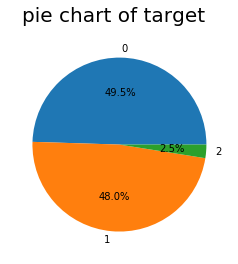

In [67]:
label_frequency = original_df['TARGET'].value_counts()
plt.figure(p_num)
p_num +=1
plt.suptitle("pie chart of target", fontsize=20)
plt.pie(label_frequency,labels=list(label_frequency.index), autopct='%1.1f%%', textprops={'fontsize': 10})
plt.show()

### Features

In [68]:
def create_feature_pie_chart(Column_name, p_num):
    label_frequency = original_df[Column_name].value_counts()
    plt.figure(p_num)
    p_num +=1
    plt.suptitle("pie chart of " + Column_name, fontsize=20)
    plt.pie(label_frequency,labels=list(label_frequency.index), autopct='%1.1f%%', textprops={'fontsize': 10})
    plt.show()
    return p_num

In [40]:
def create_pie_charts_for_all_features(columns_list, p_num):
    for column in columns_list:
        p_num = create_feature_pie_chart(column, p_num)

In [22]:
def get_categorial_column_names(df):
    types_df = df.dtypes.reset_index()
    cols_list = list(types_df['index'][types_df[0]=='object'])
    cols_list.extend(list(types_df['index'][types_df['index'].str.startswith('FLAG')]))
    return cols_list

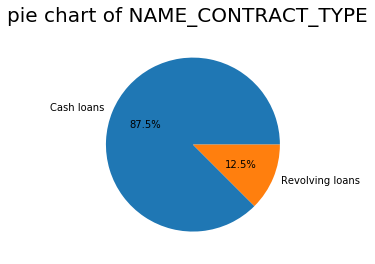

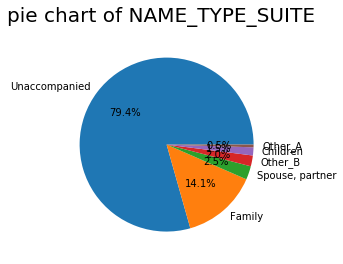

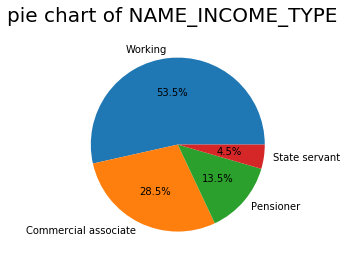

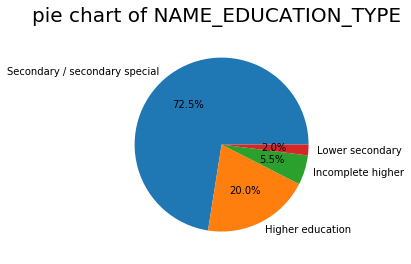

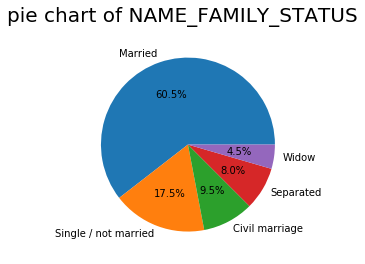

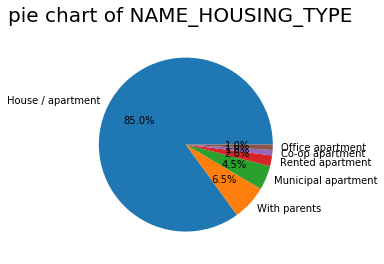

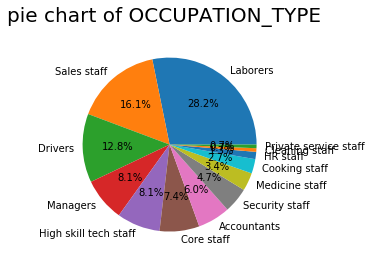

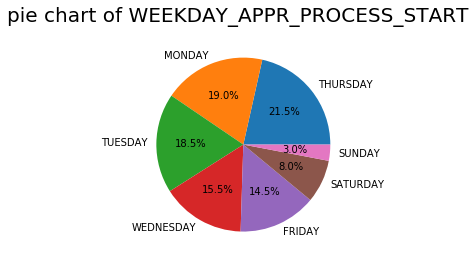

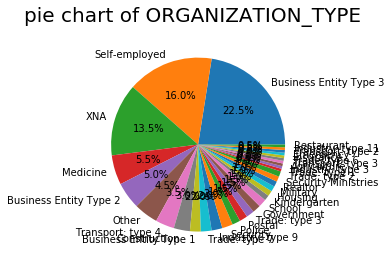

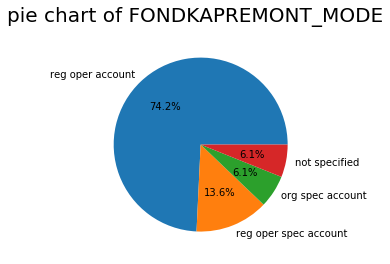

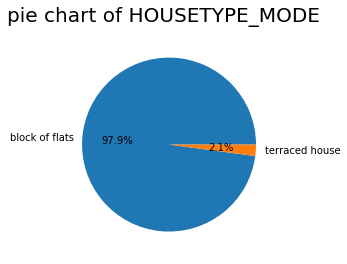

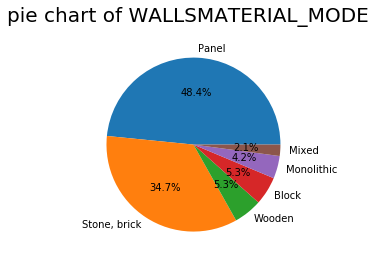

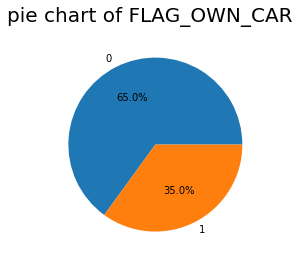

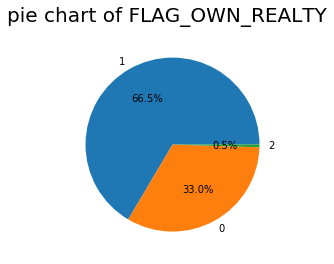

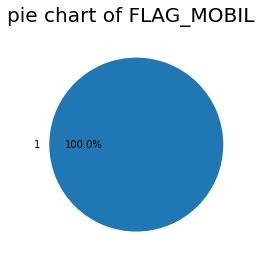

In [78]:
create_pie_charts_for_all_features(get_categorial_column_names(original_df),p_num)

## Bar Plot

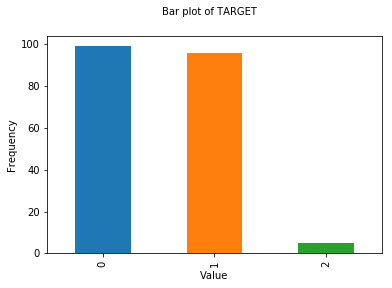

In [74]:
plt.figure(p_num)
p_num +=1
plt.suptitle("Bar plot of TARGET", fontsize=10)
feature_frequncy_0 = original_df['TARGET'].value_counts()
feature_frequncy_0.plot(kind='bar')
plt.xlabel("Value",fontdict={'fontsize': 10})
plt.ylabel("Frequency",fontdict={'fontsize': 10})
plt.show()

In [75]:
def create_feature_bar_plot(Column_name, p_num):
    plt.figure(p_num)
    p_num +=1
    plt.suptitle("Bar plot of " + Column_name, fontsize=10)
    feature_frequncy_0 = original_df[Column_name].value_counts()
    feature_frequncy_0.plot(kind='bar')
    plt.xlabel("Value",fontdict={'fontsize': 10})
    plt.ylabel("Frequency",fontdict={'fontsize': 10})
    plt.show()
    return p_num

In [76]:
def create_bar_plots_for_all_features(columns_list, p_num):
    for column in columns_list:
        p_num = create_feature_bar_plot(column, p_num)

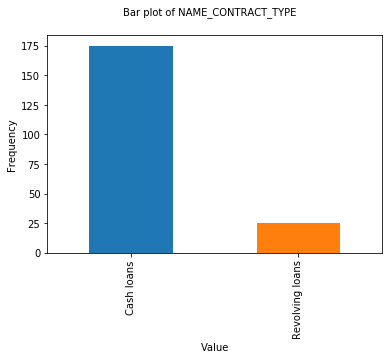

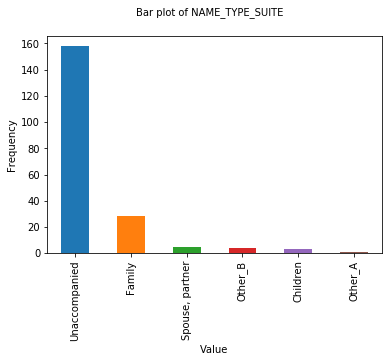

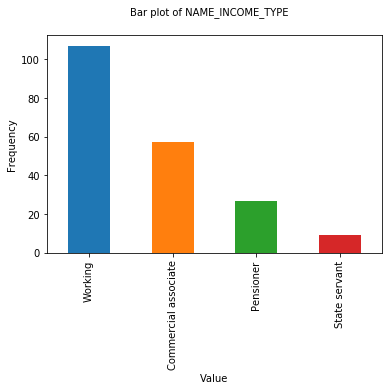

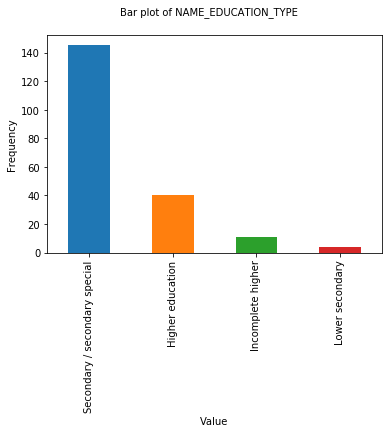

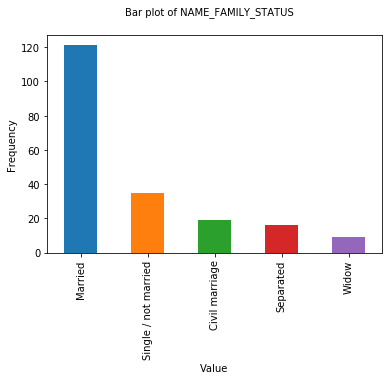

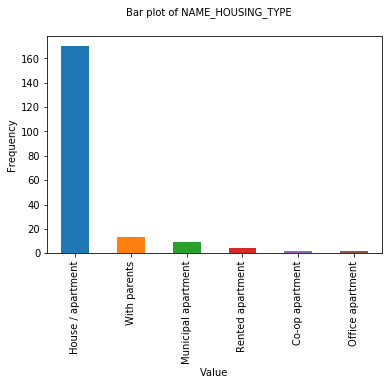

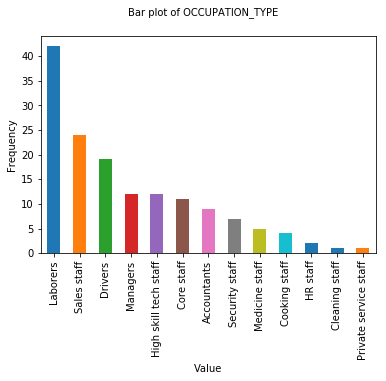

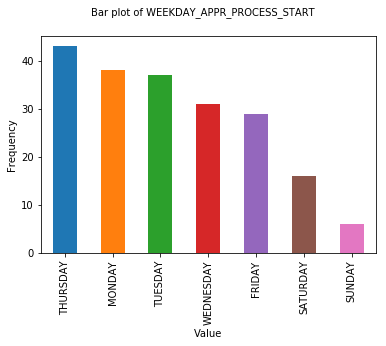

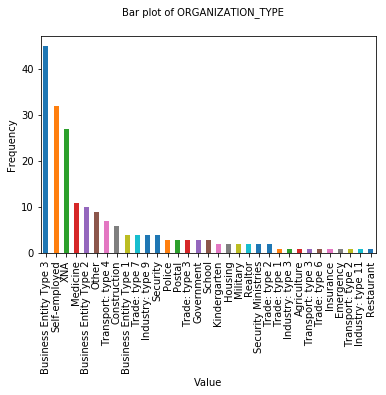

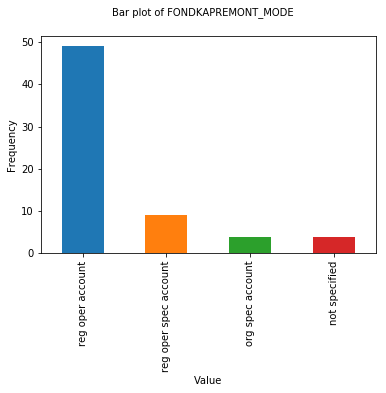

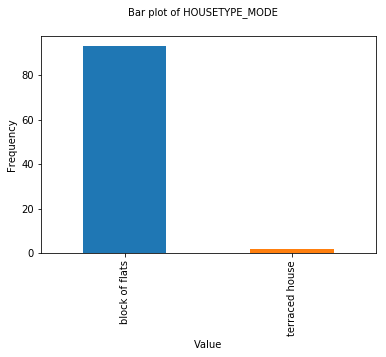

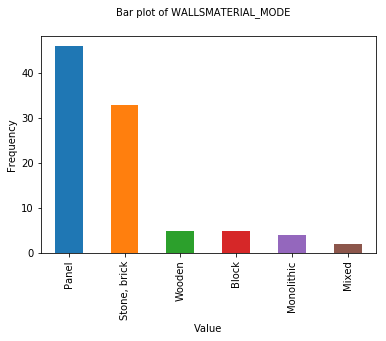

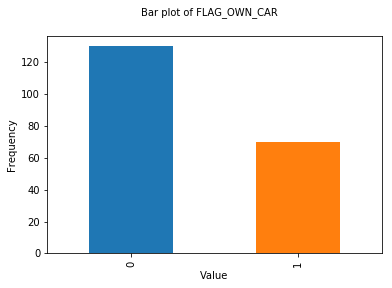

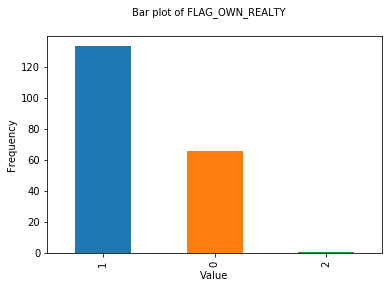

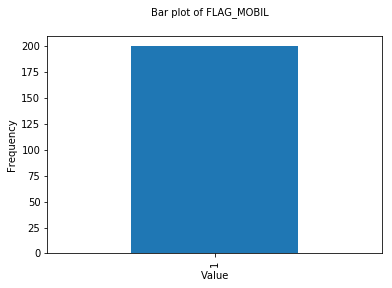

In [79]:
create_bar_plots_for_all_features(get_categorial_column_names(original_df),p_num)

## Box Plot

In [27]:
def get_non_object_column_names(df):
    types_df = df.dtypes.reset_index()
    cols_list = list(types_df['index'][types_df[0]!='object'])
    return cols_list

In [28]:
def box_plot_all_features(df, p_num):
    for i,col in enumerate(get_non_object_column_names(original_df)):
        if i>1:
            break
        try:
            plt.figure(p_num)
            p_num +=1
            sns.boxplot(data = df.iloc[:,i:i+1])
            sns.swarmplot(data = df.iloc[:,i:i+1],color=".25")
            plt.xlabel("Feature",fontdict={'fontsize': 20})
            plt.ylabel("Value",fontdict={'fontsize': 20})
        except ValueError:
            continue

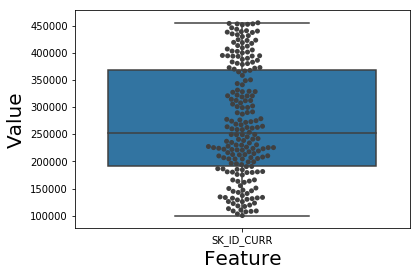

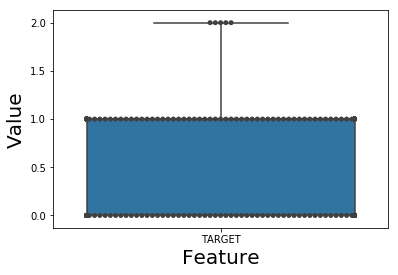

In [29]:
box_plot_all_features(original_df, p_num)

## Histogram

In [19]:
def get_histogram_for_column(column_name,p_num):
    plt.figure(p_num)
    p_num +=1
    plt.hist(original_df[column_name],stacked=True, histtype='bar')
    plt.xlabel("Feature",fontdict={'fontsize': 20})
    plt.ylabel("Value",fontdict={'fontsize': 20})
    plt.suptitle("Histogram of " + column_name, fontsize=10)
    plt.show()
    return p_num

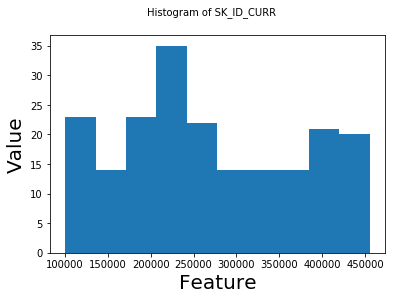

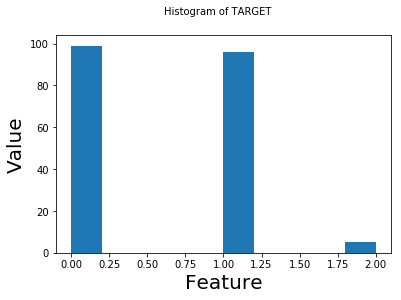

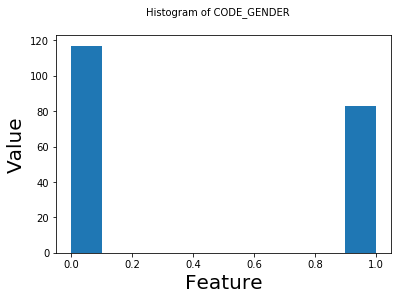

C:\Users\james\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\james\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


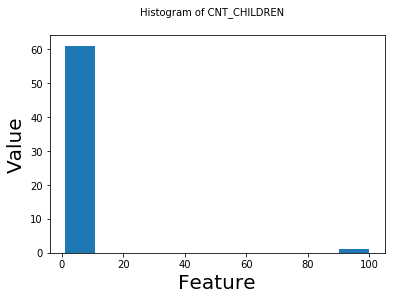

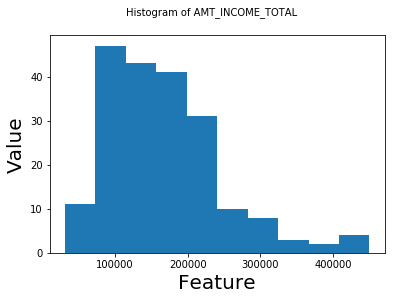

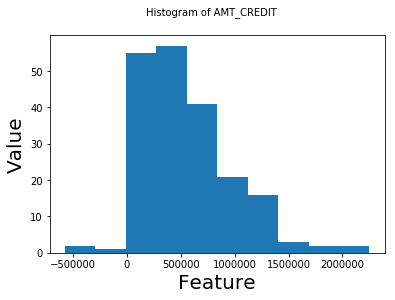

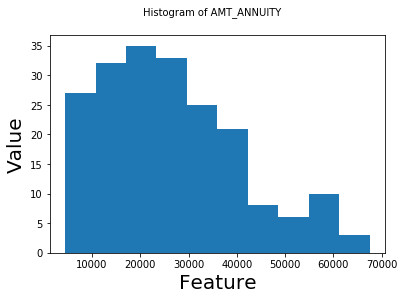

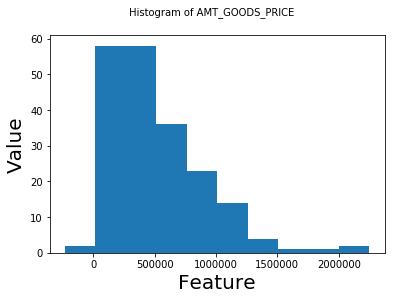

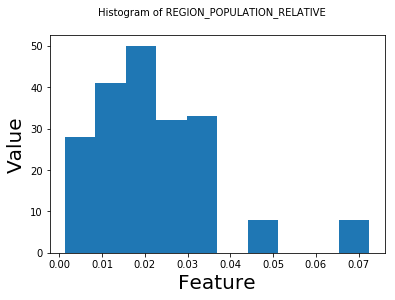

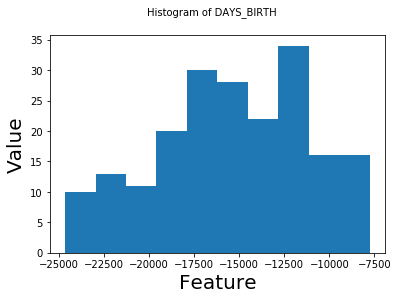

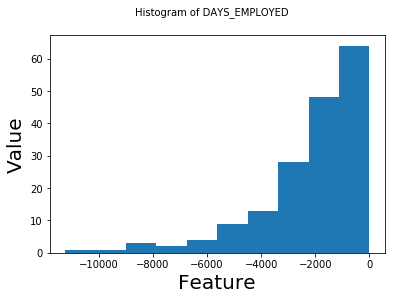

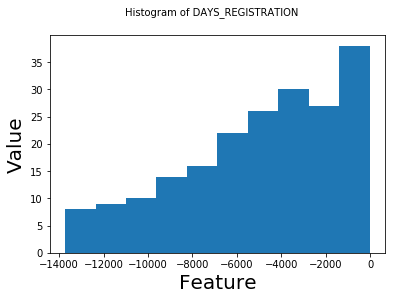

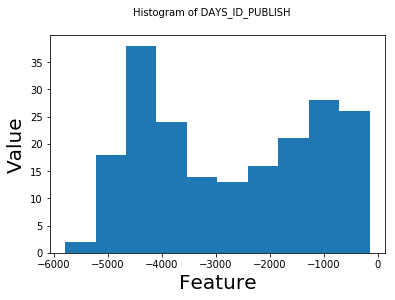

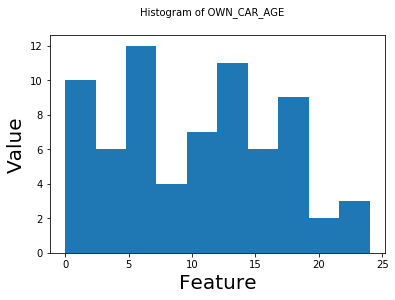

In [24]:
for col in [c for c in original_df.columns if c not in get_categorial_column_names(original_df)]:
    get_histogram_for_column(col,p_num)